<a href="https://colab.research.google.com/github/nathAlv08/cyberids-capstone/blob/main/ClassificationData%26SummarizationIBMCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
try:
    from google.colab import userdata
    api_token = userdata.get("REPLICATE_API")
except Exception:
    api_token = None

if not api_token:
    api_token = os.getenv("REPLICATE_API_TOKEN")

if not api_token:
    print("WARNING: Replicate API token not found.")
else:
    os.environ["REPLICATE_API_TOKEN"] = api_token

from langchain_community.llms import Replicate
MODEL_NAME = "ibm-granite/granite-3.3-8b-instruct"

llm = None
if api_token:
    llm = Replicate(model=MODEL_NAME, replicate_api_token=api_token)
    print("Granite initialized.")



Granite initialized.


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d chethuhn/network-intrusion-dataset
!unzip -q network-intrusion-dataset.zip -d ./data


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset
License(s): CC0-1.0
network-intrusion-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace ./data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Friday-WorkingHours-Morning.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Monday-WorkingHours.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Tuesday-WorkingHours.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./data/Wednesday-work

In [ ]:
import os
os.listdir("./data")


['Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv']

In [ ]:
import glob

all_files = glob.glob("./data/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

print("Combined dataset shape:", df.shape)
df.head()

Combined dataset shape: (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip()

print(df.columns[-5:])
print(df['Label'].value_counts())



Index(['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label'], dtype='object')
Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                

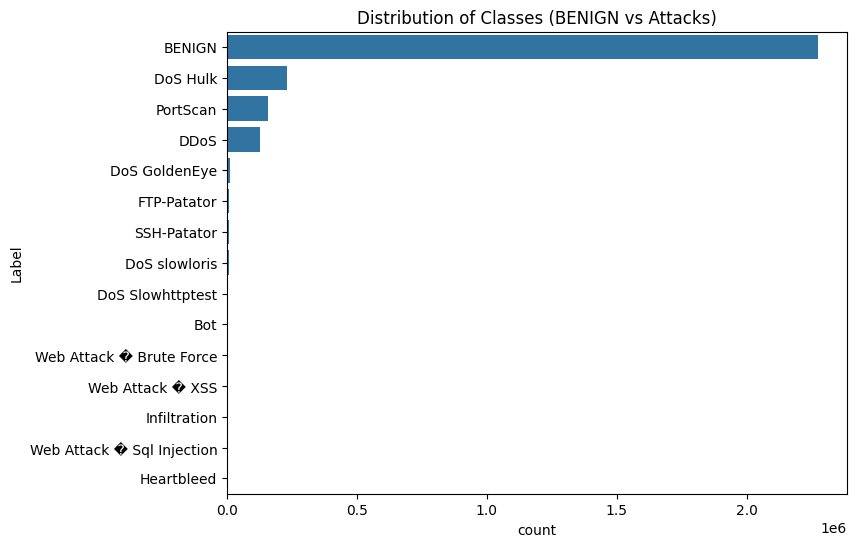

In [ ]:
print("Dataset info:")
df.columns = df.columns.str.strip()
print(df.info())

print("\nLabel distribution:")
print(df['Label'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(y="Label", data=df, order=df['Label'].value_counts().index)
plt.title("Distribution of Classes (BENIGN vs Attacks)")
plt.show()

In [ ]:
df.columns = df.columns.str.strip()
print("Columns cleaned. Example tail columns:", df.columns[-6:].tolist())

orig_counts = df['Label'].value_counts()
print("Original label counts (top 20):\n", orig_counts.head(20))

df['binary_label'] = df['Label'].apply(lambda x: 'BENIGN' if str(x).strip().upper() == 'BENIGN' else 'ATTACK')

print("\nBinary distribution:")
print(df['binary_label'].value_counts())

Columns cleaned. Example tail columns: ['Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']
Original label counts (top 20):
 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Binary distribution:
binary_label
BENIGN    2273097
ATTACK     557646
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

def create_balanced_sample(df, label_col='binary_label', target_n_total=150_000, min_per_class=500):
    """
    Create a stratified sample with at most target_n_total rows.
    For binary label (BENIGN/ATTACK), we'll:
      - cap BENIGN to half of target_n_total
      - ensure attack classes (original Label) are sampled proportionally, but keep variety.
    Returns sampled dataframe.
    """
    total = len(df)
    print(f"Full dataset rows: {total:,}")
    if total <= target_n_total:
        print("Dataset smaller than target. Returning full df.")
        return df.copy()

    benign = df[df[label_col] == 'BENIGN']
    attacks = df[df[label_col] == 'ATTACK']

    target_benign = target_n_total // 2
    target_attack = target_n_total - target_benign

    print(f"Target sample: total={target_n_total}, benign~{target_benign}, attack~{target_attack}")

    benign_sample = benign.sample(n=min(target_benign, len(benign)), random_state=42)

    attack_counts = attacks['Label'].value_counts()
    per_attack = (attack_counts / attack_counts.sum() * target_attack).round().astype(int)
    per_attack = per_attack.apply(lambda x: max(x, min_per_class))
    diff = per_attack.sum() - target_attack
    if diff > 0:
        for cls in per_attack.sort_values(ascending=False).index:
            reducible = per_attack[cls] - min_per_class
            reduce_by = min(diff, reducible)
            per_attack[cls] -= reduce_by
            diff -= reduce_by
            if diff == 0:
                break

    attack_parts = []
    for cls, n in per_attack.items():
        sub = attacks[attacks['Label'] == cls]
        if len(sub) == 0:
            continue
        sample_n = min(n, len(sub))
        attack_parts.append(sub.sample(n=sample_n, random_state=42))

    attack_sample = pd.concat(attack_parts, ignore_index=True)

    sampled = pd.concat([benign_sample, attack_sample], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
    print("Sampled counts (binary):\n", sampled['binary_label'].value_counts())
    print("Sampled counts (attack types):\n", sampled['Label'].value_counts().head(20))
    return sampled

sampled_df = create_balanced_sample(df, label_col='binary_label', target_n_total=300_000, min_per_class=600)
print("Sampled dataframe shape:", sampled_df.shape)


Full dataset rows: 2,830,743
Target sample: total=300000, benign~150000, attack~150000
Sampled counts (binary):
 binary_label
BENIGN    150000
ATTACK    148268
Name: count, dtype: int64
Sampled counts (attack types):
 Label
BENIGN                        150000
DoS Hulk                       59684
PortScan                       42750
DDoS                           34438
DoS GoldenEye                   2769
FTP-Patator                     2135
SSH-Patator                     1586
DoS slowloris                   1559
DoS Slowhttptest                1479
Web Attack � Brute Force         600
Web Attack � XSS                 600
Bot                              600
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64
Sampled dataframe shape: (298268, 80)


In [ ]:
import numpy as np

work_df = sampled_df.copy()

drop_prefixes = ['FlowID', 'Timestamp', 'Src IP', 'Dst IP', 'Source IP', 'Destination IP']
drop_cols = [c for c in work_df.columns if any(c.lower().startswith(p.lower()) for p in drop_prefixes)]
drop_cols = list(set(drop_cols))
print("Dropping columns (if exist):", drop_cols)
work_df = work_df.drop(columns=[c for c in drop_cols if c in work_df.columns], errors='ignore')

label_col = 'binary_label'
orig_label_col = 'Label'
numeric_cols = work_df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Detected {len(numeric_cols)} numeric features. Example: {numeric_cols[:10]}")
X = work_df[numeric_cols].fillna(0).copy()
y_binary = work_df[label_col].map({'BENIGN':0, 'ATTACK':1}).astype(int)



Dropping columns (if exist): []
Detected 78 numeric features. Example: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (238614, 78) Test shape: (59654, 78)


Classification report (binary):
              precision    recall  f1-score   support

           0     0.9985    0.9986    0.9986     30000
           1     0.9985    0.9985    0.9985     29654

    accuracy                         0.9985     59654
   macro avg     0.9985    0.9985    0.9985     59654
weighted avg     0.9985    0.9985    0.9985     59654


Precision: 0.9985  Recall: 0.9985  F1: 0.9985  ROC-AUC: 0.9996  Avg Precision (PR-AUC): 0.9992


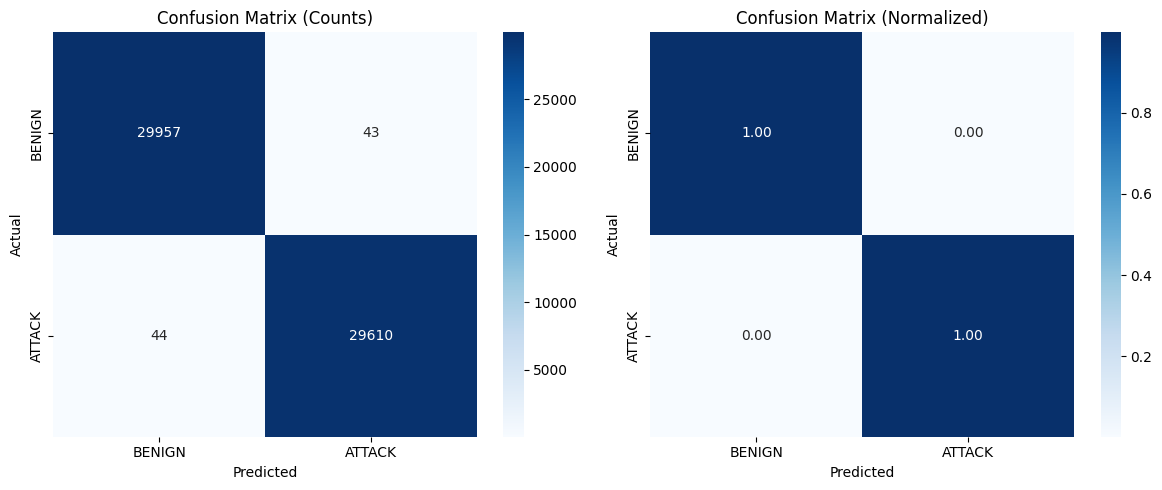

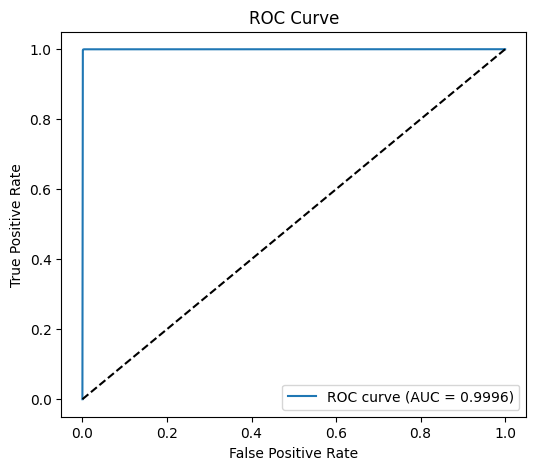

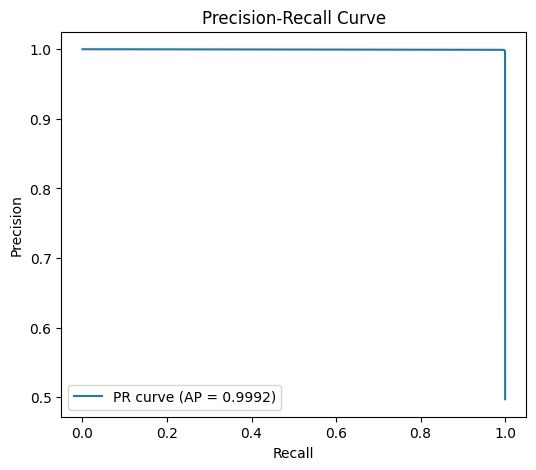

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score, precision_score, recall_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)

rf = RandomForestClassifier(
    n_estimators=250,
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:,1]

print("Classification report (binary):")
print(classification_report(y_test, y_pred, digits=4))

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

print(f"\nPrecision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC-AUC: {auc:.4f}  Avg Precision (PR-AUC): {ap:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN','ATTACK'], yticklabels=['BENIGN','ATTACK'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion Matrix (Counts)')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1,2,2)
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN','ATTACK'], yticklabels=['BENIGN','ATTACK'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')

plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(rec_curve, prec_curve, label=f'PR curve (AP = {ap:.4f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=200, max_samples=10000, contamination='auto', random_state=42, n_jobs=-1)

X_train_benign = X_train[y_train == 0]
print("Fitting IsolationForest on benign subset size:", X_train_benign.shape)
iso.fit(X_train_benign)

iso_pred = iso.predict(X_test_scaled)
iso_pred_binary = np.where(iso_pred == -1, 1, 0)

print("IsolationForest classification report:")
print(classification_report(y_test, iso_pred_binary, digits=4))
iso_prec = precision_score(y_test, iso_pred_binary)
iso_rec = recall_score(y_test, iso_pred_binary)
iso_f1 = f1_score(y_test, iso_pred_binary)
print(f"IForest Precision: {iso_prec:.4f}  Recall: {iso_rec:.4f}  F1: {iso_f1:.4f}")

Fitting IsolationForest on benign subset size: (120000, 78)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest classification report:
              precision    recall  f1-score   support

           0     0.5029    1.0000    0.6692     30000
           1     0.0000    0.0000    0.0000     29654

    accuracy                         0.5029     59654
   macro avg     0.2515    0.5000    0.3346     59654
weighted avg     0.2529    0.5029    0.3366     59654

IForest Precision: 0.0000  Recall: 0.0000  F1: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Approx attack ratio in sample: 0.4971 (use as a guide for contamination)
Fitting IsolationForest on benign subset size: (120000, 78)

-- Trying contamination = 0.001 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0000  Recall: 0.0000  F1: 0.0000  AvgPrecision(preds): 0.4971

-- Trying contamination = 0.002 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0000  Recall: 0.0000  F1: 0.0000  AvgPrecision(preds): 0.4971

-- Trying contamination = 0.005 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0000  Recall: 0.0000  F1: 0.0000  AvgPrecision(preds): 0.4971

-- Trying contamination = 0.01 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0000  Recall: 0.0000  F1: 0.0000  AvgPrecision(preds): 0.4971

-- Trying contamination = 0.02 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0000  Recall: 0.0000  F1: 0.0000  AvgPrecision(preds): 0.4971

-- Trying contamination = 0.05 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0000  Recall: 0.0000  F1: 0.0000  AvgPrecision(preds): 0.4971

-- Trying contamination = 0.1 --


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 0.0526  Recall: 0.0002  F1: 0.0003  AvgPrecision(preds): 0.4970


,contamination,precision,recall,f1,avg_precision
0,0.001,0.000000,0.000000,0.000000,0.497100
1,0.002,0.000000,0.000000,0.000000,0.497100
2,0.005,0.000000,0.000000,0.000000,0.497100
3,0.010,0.000000,0.000000,0.000000,0.497100
4,0.020,0.000000,0.000000,0.000000,0.497100
5,0.050,0.000000,0.000000,0.000000,0.497100
6,0.100,0.052632,0.000169,0.000336,0.497025



Best contamination (by attack recall): 0.1
contamination    0.100000
precision        0.052632
recall           0.000169
f1               0.000336
avg_precision    0.497025
Name: 6, dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



IsolationForest (best) classification report:
              precision    recall  f1-score   support

           0     0.5022    0.9970    0.6679     30000
           1     0.0526    0.0002    0.0003     29654

    accuracy                         0.5015     59654
   macro avg     0.2774    0.4986    0.3341     59654
weighted avg     0.2787    0.5015    0.3361     59654



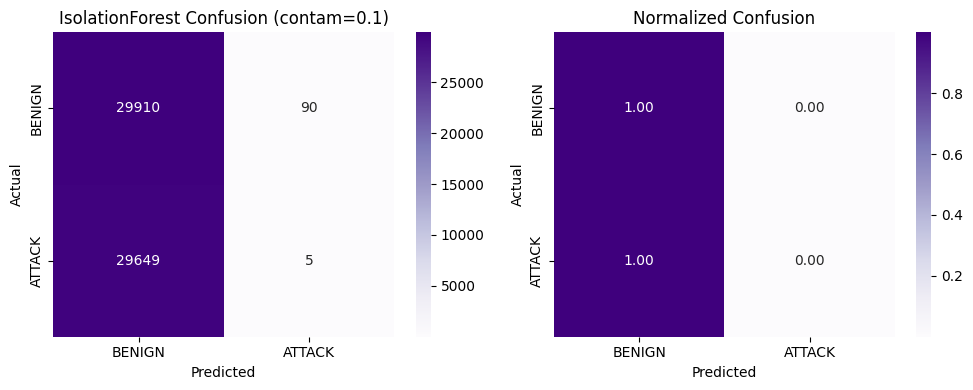

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


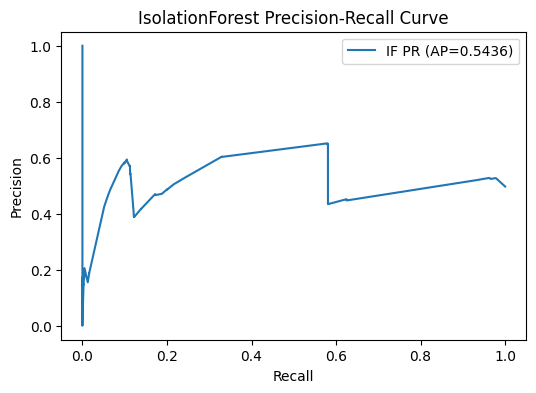



=== Quick Summary for README / Slides ===
- IsolationForest was trained on benign-only data (n=120000).
- We tested contamination values: [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
- Best contamination by attack recall: 0.1 -> recall=0.0002, precision=0.0526

Interpretation suggestions:
- IsolationForest performed poorly (low recall). It missed most attacks. This is expected when attack patterns are not strong outliers.
- Conclusion: For CICIDS2017, supervised methods (RandomForest/XGBoost) outperform pure anomaly detection.


In [ ]:
# === IsolationForest tuning experiment (use original imbalance / do NOT re-balance here) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve

# Compute attack ratio in the sampled dataset (for guidance)
attack_count = y_binary.sum() if 'y_binary' in globals() else np.sum(y_train==1) + np.sum(y_test==1)
total_count = len(y_binary) if 'y_binary' in globals() else len(y_train) + len(y_test)
attack_ratio = attack_count / total_count
print(f"Approx attack ratio in sample: {attack_ratio:.4f} (use as a guide for contamination)")

# Prepare benign training set for IsolationForest (use original unbalanced X_train not rebalanced)
X_train_benign = X_train[y_train == 0]
print("Fitting IsolationForest on benign subset size:", X_train_benign.shape)

# contamination grid to try (small values first)
contamination_grid = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

results = []
fitted_models = {}

for contam in contamination_grid:
    print(f"\n-- Trying contamination = {contam} --")
    iso = IsolationForest(
        n_estimators=200,
        max_samples=min(10000, len(X_train_benign)),
        contamination=contam,
        random_state=42,
        n_jobs=-1
    )
    # fit on benign-only data
    try:
        iso.fit(X_train_benign)
    except Exception as e:
        iso.fit(X_train_benign.values)

    # predict on test set: -1 = anomaly -> map to attack=1, 1 = normal -> 0
    iso_pred = iso.predict(X_test_scaled)
    iso_pred_binary = np.where(iso_pred == -1, 1, 0)

    prec = precision_score(y_test, iso_pred_binary, zero_division=0)
    rec = recall_score(y_test, iso_pred_binary, zero_division=0)
    f1 = f1_score(y_test, iso_pred_binary, zero_division=0)
    ap = average_precision_score(y_test, iso_pred_binary)

    print(f"Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AvgPrecision(preds): {ap:.4f}")

    results.append({
        "contamination": contam,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "avg_precision": ap
    })
    fitted_models[contam] = iso

results_df_iso = pd.DataFrame(results).sort_values(by='contamination')
display(results_df_iso)

# Choose best model by highest recall (we often prefer recall for IDS)
best_row = results_df_iso.sort_values(by='recall', ascending=False).iloc[0]
best_contam = best_row['contamination']
best_iso = fitted_models[best_contam]
print("\nBest contamination (by attack recall):", best_contam)
print(best_row)

# Evaluate best model with more detail (confusion, pr curve)
best_pred = best_iso.predict(X_test_scaled)
best_pred_bin = np.where(best_pred == -1, 1, 0)

print("\nIsolationForest (best) classification report:")
print(classification_report(y_test, best_pred_bin, digits=4, zero_division=0))

cm = confusion_matrix(y_test, best_pred_bin)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['BENIGN','ATTACK'], yticklabels=['BENIGN','ATTACK'])
plt.title(f'IsolationForest Confusion (contam={best_contam})')
plt.xlabel('Predicted'); plt.ylabel('Actual')

# Normalized
plt.subplot(1,2,2)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=['BENIGN','ATTACK'], yticklabels=['BENIGN','ATTACK'])
plt.title('Normalized Confusion')
plt.xlabel('Predicted'); plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# PR curve (use decision function to get anomaly score)
if hasattr(best_iso, "decision_function"):
    scores = -best_iso.decision_function(X_test_scaled)
    p, r, _ = precision_recall_curve(y_test, scores)
    ap_score = average_precision_score(y_test, scores)
    plt.figure(figsize=(6,4))
    plt.plot(r, p, label=f'IF PR (AP={ap_score:.4f})')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('IsolationForest Precision-Recall Curve'); plt.legend()
    plt.show()
else:
    print("No decision_function available; skipped PR curve.")

# Quick summary to copy into README/notes
print("\n\n=== Quick Summary for README / Slides ===")
print(f"- IsolationForest was trained on benign-only data (n={len(X_train_benign)}).")
print("- We tested contamination values:", contamination_grid)
print(f"- Best contamination by attack recall: {best_contam} -> recall={best_row['recall']:.4f}, precision={best_row['precision']:.4f}")
print("\nInterpretation suggestions:")
if best_row['recall'] < 0.1:
    print("- IsolationForest performed poorly (low recall). It missed most attacks. This is expected when attack patterns are not strong outliers.")
    print("- Conclusion: For CICIDS2017, supervised methods (RandomForest/XGBoost) outperform pure anomaly detection.")
else:
    print("- IsolationForest achieved moderate recall — may be useful as a lightweight anomaly flagger, but typically produces many false positives.")


Classification Report (per-class & averages):
              precision    recall  f1-score   support

           0     0.9985    0.9986    0.9986     30000
           1     0.9985    0.9985    0.9985     29654

    accuracy                         0.9985     59654
   macro avg     0.9985    0.9985    0.9985     59654
weighted avg     0.9985    0.9985    0.9985     59654



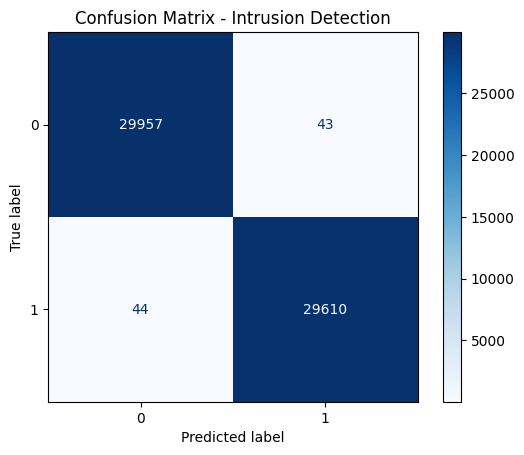

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test_scaled)

print("Classification Report (per-class & averages):")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Intrusion Detection")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=250, class_weight='balanced_subsample', n_jobs=-1, random_state=42
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=200, class_weight='balanced', solver='lbfgs', n_jobs=-1, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
        scale_pos_weight=1, eval_metric="logloss", use_label_encoder=False, random_state=42
    )
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]

    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": auc,
        "PR-AUC": ap
    })

results_df = pd.DataFrame(results)
print("🔎 Model Performance Comparison:")
display(results_df.round(4))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:22:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔎 Model Performance Comparison:


,Model,Precision,Recall,F1,ROC-AUC,PR-AUC
0,RandomForest,0.9985,0.9985,0.9985,0.9996,0.9992
1,LogisticRegression,0.9047,0.9514,0.9275,0.9755,0.9717
2,XGBoost,0.9987,0.9995,0.9991,0.9999,0.9999


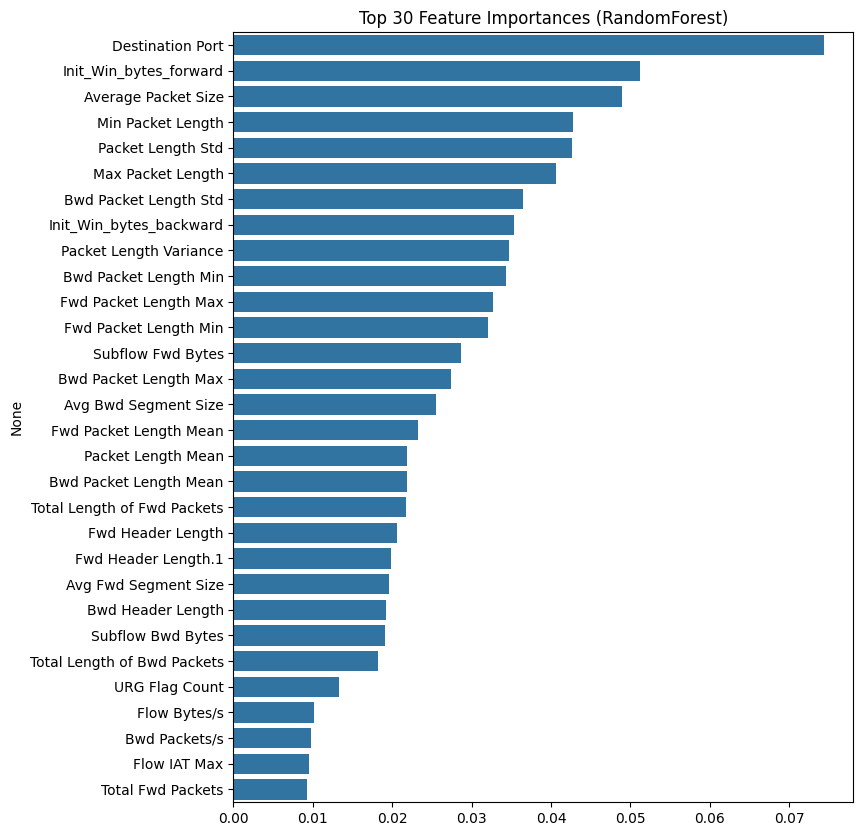

Selected top features: ['Destination Port', 'Init_Win_bytes_forward', 'Average Packet Size', 'Min Packet Length', 'Packet Length Std', 'Max Packet Length', 'Bwd Packet Length Std', 'Init_Win_bytes_backward', 'Packet Length Variance', 'Bwd Packet Length Min', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Subflow Fwd Bytes', 'Bwd Packet Length Max', 'Avg Bwd Segment Size', 'Fwd Packet Length Mean', 'Packet Length Mean', 'Bwd Packet Length Mean', 'Total Length of Fwd Packets', 'Fwd Header Length', 'Fwd Header Length.1', 'Avg Fwd Segment Size', 'Bwd Header Length', 'Subflow Bwd Bytes', 'Total Length of Bwd Packets', 'URG Flag Count', 'Flow Bytes/s', 'Bwd Packets/s', 'Flow IAT Max', 'Total Fwd Packets']


In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=numeric_cols).sort_values(ascending=False)
top_feats = feat_imp.head(30)
plt.figure(figsize=(8,10))
sns.barplot(x=top_feats.values, y=top_feats.index)
plt.title("Top 30 Feature Importances (RandomForest)")
plt.show()

TOP_K = 30
selected_features = top_feats.index.tolist()[:TOP_K]
print("Selected top features:", selected_features)

X_train_top = X_train[selected_features]
X_test_top = X_test[selected_features]
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

In [ ]:
rf2 = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', n_jobs=-1, random_state=42)
rf2.fit(X_train_top_scaled, y_train)
y2_pred = rf2.predict(X_test_top_scaled)
y2_proba = rf2.predict_proba(X_test_top_scaled)[:,1]

print("Classification report (top-features RF):")
print(classification_report(y_test, y2_pred, digits=4))
print("ROC-AUC (top-features):", roc_auc_score(y_test, y2_proba))

Classification report (top-features RF):
              precision    recall  f1-score   support

           0     0.9988    0.9985    0.9987     30000
           1     0.9985    0.9988    0.9987     29654

    accuracy                         0.9987     59654
   macro avg     0.9987    0.9987    0.9987     59654
weighted avg     0.9987    0.9987    0.9987     59654

ROC-AUC (top-features): 0.9995974421663182


Final SHAP shape: (2000, 78, 2)
Test subset shape: (2000, 78)


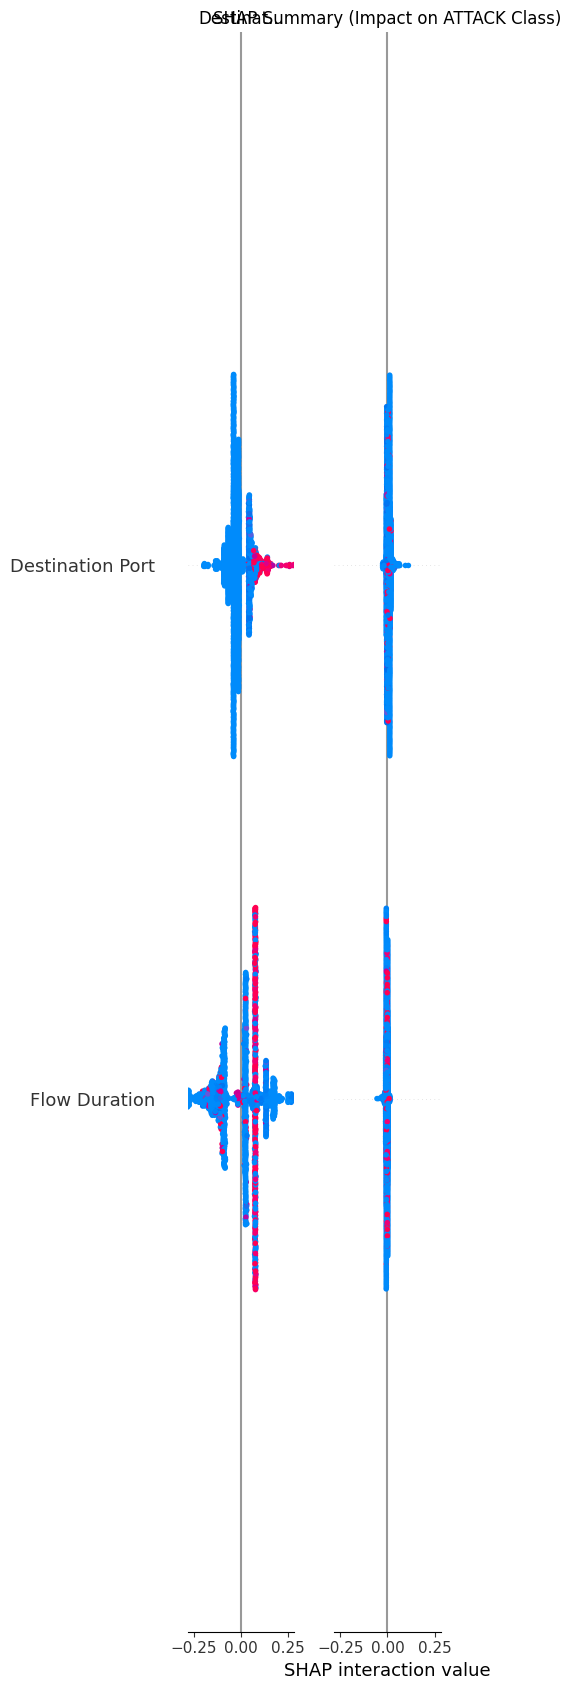

In [ ]:
import shap
import matplotlib.pyplot as plt

test_subset = pd.DataFrame(
    X_test_scaled[:2000],
    columns=X_train.columns
)

explainer = shap.TreeExplainer(rf)
shap_values_raw = explainer.shap_values(test_subset)

if isinstance(shap_values_raw, list) and len(shap_values_raw) == 2:
    shap_values = shap_values_raw[1]

elif isinstance(shap_values_raw, list) and all(len(s.shape) == 2 for s in shap_values_raw):
    shap_values = np.mean([sv for sv in shap_values_raw], axis=0)
else:
    shap_values = shap_values_raw

print("Final SHAP shape:", shap_values.shape)
print("Test subset shape:", test_subset.shape)

shap.summary_plot(
    shap_values,
    test_subset,
    feature_names=test_subset.columns,
    max_display=20,
    show=False
)
plt.title("SHAP Summary (Impact on ATTACK Class)")
plt.tight_layout()
plt.show()




In [ ]:
summary_prompt = f"""
    You are a cybersecurity analyst.
    We trained a Random Forest intrusion detection model on the CICIDS2017 dataset
    with SHAP feature importance.

    Dataset size: {X.shape}
    Attack ratio: {y_binary.sum()}/{len(y_binary)}

    Top insights:
    - The model achieves strong accuracy with class balancing.
    - SHAP analysis highlights key traffic features driving attack detection.

    Please provide:
    1. Executive summary (for presentation).
    2. Practical recommendations for improving cybersecurity systems.
    """

    print(">>> Granite summarization & recommendations:")
    print(llm.invoke(summary_prompt))
else:
    print("Granite not initialized. Please set API token first.")

>>> Granite summarization & recommendations:
1. Executive Summary:

Our cybersecurity team has successfully trained a Random Forest intrusion detection model using the CICIDS2017 dataset, incorporating SHAP (SHapley Additive exPlanations) for feature importance analysis. The model, with a dataset size of (298268, 78) and an attack ratio of 148268/298268, demonstrates robust performance and strong accuracy. Class balancing techniques have been employed to ensure the model's effectiveness in identifying both benign and malicious network activities. SHAP analysis has revealed crucial traffic features that significantly contribute to attack detection, providing valuable insights for enhancing intrusion detection capabilities.

2. Practical Recommendations for Improving Cybersecurity Systems:

a) Feature Engineering: Leverage the insights from SHAP analysis to prioritize and refine feature engineering. Focus on the most influential traffic features identified for attack detection, such as p

SHAP ATTACK shape: (2000, 78)
Test subset shape: (2000, 78)
Top 5 important features:
                   feature  importance
0        Destination Port    0.050530
13  Bwd Packet Length Std    0.028655
41      Packet Length Std    0.025431
38      Min Packet Length    0.023501
52    Average Packet Size    0.022457


/tmp/ipython-input-457608193.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=top5_features, palette="viridis")


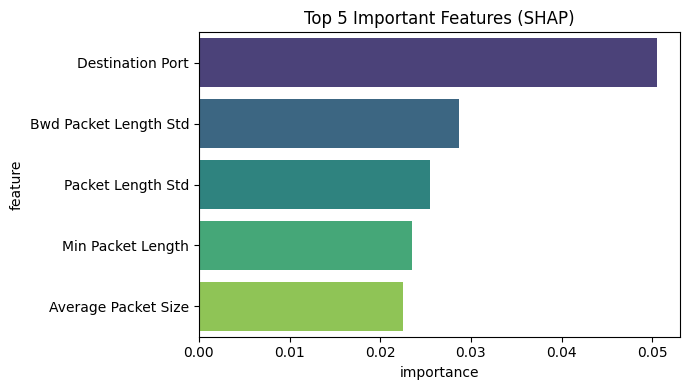

In [ ]:
if shap_values.ndim == 3:
    shap_attack = shap_values[:, :, 1]
else:
    shap_attack = shap_values

print("SHAP ATTACK shape:", shap_attack.shape)
print("Test subset shape:", test_subset.shape)

shap_mean = np.abs(shap_attack).mean(axis=0)

shap_importance = pd.DataFrame({
    "feature": test_subset.columns,
    "importance": shap_mean
}).sort_values(by="importance", ascending=False)

top5_features = shap_importance.head(5)
print("Top 5 important features:\n", top5_features)

plt.figure(figsize=(7,4))
sns.barplot(x="importance", y="feature", data=top5_features, palette="viridis")
plt.title("Top 5 Important Features (SHAP)")
plt.tight_layout()
plt.show()


In [ ]:
if llm:
    report_text = classification_report(y_test, y_pred, digits=4)

    top_feats_text = ", ".join(top5_features["feature"].tolist())

    summary_prompt = f"""
    You are an expert cybersecurity analyst.

    We trained a Random Forest intrusion detection model on the CICIDS2017-derived dataset.

    Key results:
    - Training samples: {X_train_scaled.shape[0]}
    - Features used: {X_train_scaled.shape[1]}
    - Metrics (per-class report):
    {report_text}

    Feature importance (SHAP top 5): {top_feats_text}

    Please provide:
    1. A clear executive summary (2–3 paragraphs) for non-technical stakeholders.
    2. Practical cybersecurity recommendations based on these findings.
    3. Suggestions to improve the model for real-world deployment.
    """

    print(">>> Granite summarization & recommendations:")
    print(llm.invoke(summary_prompt))
else:
    print("Granite not initialized. Please set API token first.")


>>> Granite summarization & recommendations:
1. Executive Summary:

The Random Forest intrusion detection model, trained on the CICIDS2017-derived dataset, has demonstrated exceptional performance with high precision, recall, and F1-score for both normal and intrusion classes. The model achieved an overall accuracy of 99.91%, indicating its robustness in distinguishing between legitimate network traffic and malicious activities. The top five important features contributing to the model's predictions are Destination Port, Bwd Packet Length Std, Packet Length Std, Min Packet Length, and Average Packet Size. These features suggest that packet characteristics, such as length and standard deviation, play a crucial role in identifying intrusions.

2. Practical Cybersecurity Recommendations:

- Implement the Random Forest model as a real-time intrusion detection system to monitor network traffic continuously. This will help in early detection and response to potential cyber threats, minimizin

In [ ]:
import joblib, json
joblib.dump(rf2, "rf_top_features.joblib")
joblib.dump(scaler, "scaler_top.joblib")

meta = {
    "selected_features": selected_features,
    "sampled_rows": len(work_df),
    "target_sample_strategy": "balanced (benign downsample + attack proportional cap)"
}
with open("meta.json", "w") as f:
    json.dump(meta, f, indent=2)

pd.DataFrame(report_dict).to_csv("classification_report_top_rf.csv")
print("Saved rf_top_features.joblib, scaler_top.joblib, meta.json, classification_report_top_rf.csv")



Saved rf_top_features.joblib, scaler_top.joblib, meta.json, classification_report_top_rf.csv
